In [1]:
import statsmodels.api as sm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%matplotlib inline

In [3]:
N = 100

In [4]:
X = np.random.normal(0, 1, N)

In [5]:
ϵ = np.random.normal(0, 0.25, N)

In [6]:
X = np.concatenate((np.ones_like(X)[:,np.newaxis], X[:,np.newaxis]), axis=1)
X.shape

(100, 2)

In [7]:
β = np.array([-1, 0.5])
Y = X.dot(β) + ϵ
Y.shape

(100,)

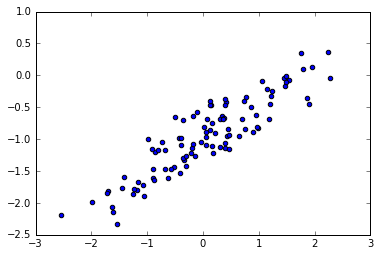

In [8]:
plt.scatter(X[:,1], Y)

In [9]:
def get_estimator(X, Y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y[:,np.newaxis])

In [10]:
θ = get_estimator(X, Y)
θ

array([[-0.98121173],
       [ 0.52867461]])

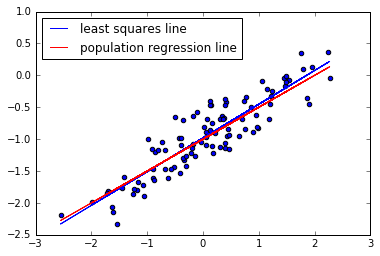

In [11]:
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], X.dot(θ), label='least squares line')
plt.plot(X[:,1], X.dot(β), label='population regression line', c='r')

plt.legend(loc=2)

In [12]:
X_ = np.concatenate((X, np.square(X[:,1])[:,np.newaxis]), axis=1)    

In [13]:
θ_ = get_estimator(X_, Y)
θ_

array([[-0.96432462],
       [ 0.53075773],
       [-0.01668789]])

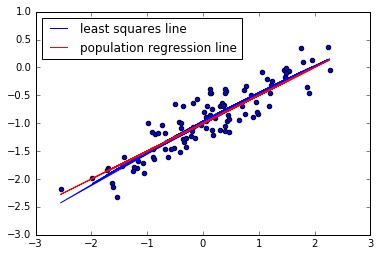

In [14]:
plt.scatter(X[:,1],Y)
plt.plot(X[:,1], X_.dot(θ_), label='least squares line')
plt.plot(X[:,1], X.dot(β), label='population regression line', c='r')

plt.legend(loc=0)

In [15]:
def square_norm(v):
    return v.T.dot(v)

In [16]:
square_norm(Y[:,np.newaxis] - X.dot(θ)), square_norm(Y[:,np.newaxis] - X_.dot(θ_))

(array([[ 6.60732409]]), array([[ 6.56072358]]))

In [17]:
ϵ_less = np.random.normal(0, 0.05, N)

In [18]:
Y_less = X.dot(β) + ϵ_less

In [19]:
θ_less = get_estimator(X, Y_less)
θ_less

array([[-1.00317661],
       [ 0.50359479]])

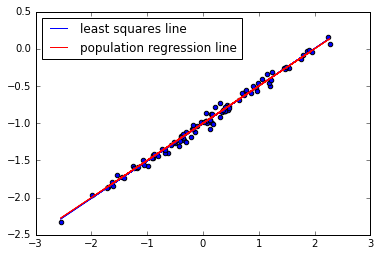

In [20]:
plt.scatter(X[:,1], Y_less)
plt.plot(X[:,1], X.dot(θ_less), label='least squares line')
plt.plot(X[:,1], X.dot(β), label='population regression line', c='r')

plt.legend(loc=2)

In [21]:
square_norm(Y_less[:,np.newaxis] - X.dot(θ_less))

array([[ 0.22526454]])

In [22]:
ϵ_more = np.random.normal(0, 0.5, N)

In [23]:
Y_more = X.dot(β) + ϵ_more

In [24]:
θ_more = get_estimator(X, Y_more)
θ_more

array([[-1.096747  ],
       [ 0.47238908]])

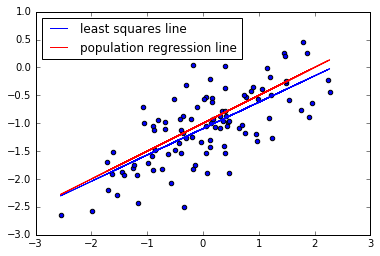

In [25]:
plt.scatter(X[:,1], Y_more)
plt.plot(X[:,1], X.dot(θ_more), label='least squares line')
plt.plot(X[:,1], X.dot(β), label='population regression line', c='r')

plt.legend(loc=2)

In [26]:
square_norm(Y_more[:,np.newaxis] - X.dot(θ_more))

array([[ 21.51508056]])

In [27]:
res = sm.OLS(Y, X).fit()
print(res.params)
print(res.conf_int(0.01))

[-0.98121173  0.52867461]
[[-1.04954178 -0.91288168]
 [ 0.46099799  0.59635123]]


In [28]:
res = sm.OLS(Y_less, X).fit()
print(res.params)
print(res.conf_int(0.01))

[-1.00317661  0.50359479]
[[-1.0157933  -0.99055992]
 [ 0.49109876  0.51609083]]


In [29]:
res = sm.OLS(Y_more, X).fit()
print(res.params)
print(res.conf_int(0.01))

[-1.096747    0.47238908]
[[-1.22004908 -0.97344491]
 [ 0.35026611  0.59451204]]
